In [22]:
from keras import layers
from keras import models

model = models.Sequential()

## MAKE model

In [2]:
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

## MNist

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 사용할 수 있게 바꾸고

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28 ,1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### training

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 30s 494us/step - loss: 0.1713 - acc: 0.9454
Epoch 2/5
60000/60000 [==============================] - 23s 381us/step - loss: 0.0454 - acc: 0.9858
Epoch 3/5
60000/60000 [==============================] - 22s 371us/step - loss: 0.0324 - acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.0240 - acc: 0.99271s - loss:
Epoch 5/5
60000/60000 [==============================] - 19s 316us/step - loss: 0.0188 - acc: 0.99420s - loss: 0.0188 - acc: 0


## 성능평가

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 250us/step


0.9914

In [11]:
import random
import matplotlib.pyplot as plt

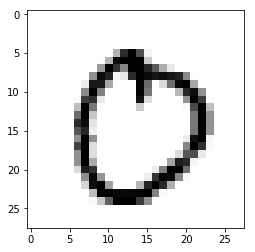

예상 정답값 :  0
실제 정답값 :  0


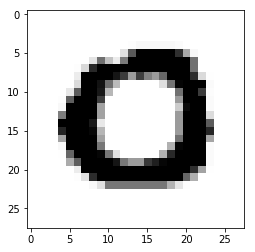

예상 정답값 :  0
실제 정답값 :  0


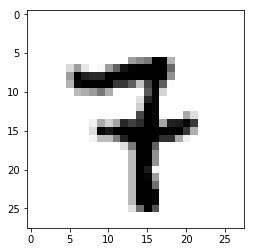

예상 정답값 :  7
실제 정답값 :  7


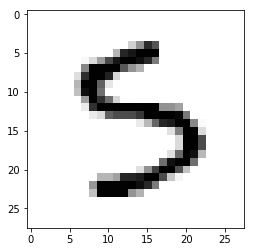

예상 정답값 :  5
실제 정답값 :  5


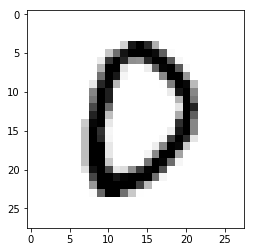

예상 정답값 :  0
실제 정답값 :  0


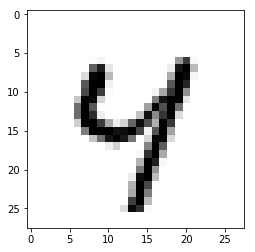

예상 정답값 :  4
실제 정답값 :  4


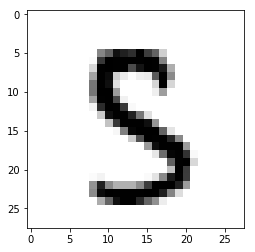

예상 정답값 :  5
실제 정답값 :  5


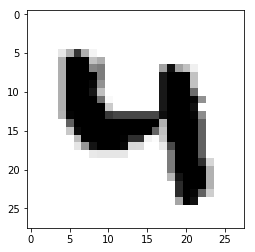

예상 정답값 :  4
실제 정답값 :  4


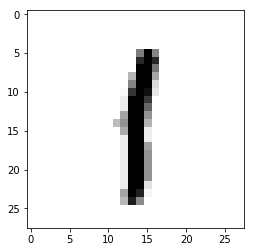

예상 정답값 :  1
실제 정답값 :  1


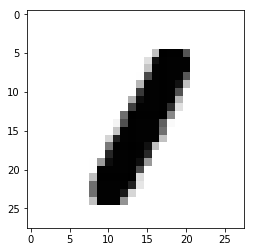

예상 정답값 :  1
실제 정답값 :  1


In [12]:
for i in range(10):
    r = random.randint(0, len(test_images) -1)

    digit = test_images[r].reshape((28, 28))
    digit = digit.astype('float32') * 255
    digit = digit.astype('uint8')
    digit

    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()
    print("예상 정답값 : ",int(model.predict_classes(test_images[r].reshape((1, 28, 28, 1)))))
    print("실제 정답값 : ",list(test_labels[r]).index(1.0))

### 틀린 모델 찾기

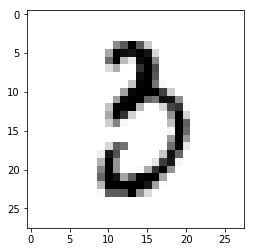

예상 정답값 :  0
실제 정답값 :  3


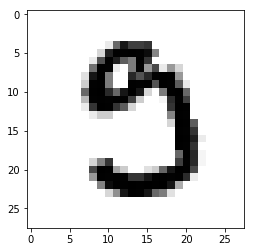

예상 정답값 :  5
실제 정답값 :  9


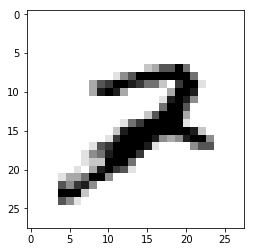

예상 정답값 :  7
실제 정답값 :  2


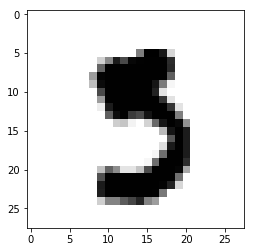

예상 정답값 :  3
실제 정답값 :  5


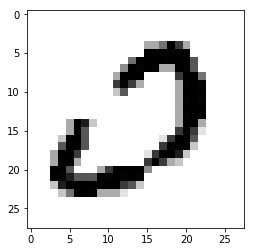

예상 정답값 :  2
실제 정답값 :  0


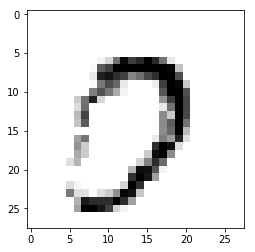

예상 정답값 :  7
실제 정답값 :  0


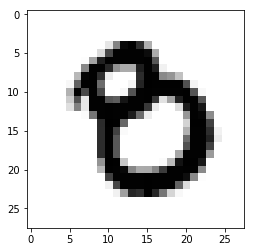

예상 정답값 :  0
실제 정답값 :  8


In [13]:
for i in range(1000):
    r = random.randint(0, len(test_images) -1)
    if int(model.predict_classes(test_images[r].reshape((1, 28, 28, 1)))) != list(test_labels[r]).index(1.0):
        digit = test_images[r].reshape((28, 28))
        digit = digit.astype('float32') * 255
        digit = digit.astype('uint8')
        digit

        plt.imshow(digit, cmap=plt.cm.binary)
        plt.show()
        print("예상 정답값 : ",int(model.predict_classes(test_images[r].reshape((1, 28, 28, 1)))))
        print("실제 정답값 : ",list(test_labels[r]).index(1.0))